## Urdu NLP using different classifiers and vectorizers

In [59]:
import pandas as pd
import numpy as np
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import pickle

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential


pd.set_option("display.max_rows",1000)
pd.set_option("display.max_colwidth",200)

### Getting data ready

In [2]:
df=pd.read_csv("Data/army_labeled_v2.csv",usecols=[1,2])

In [3]:
df.head(10)

,Sentiment,Tokenized
0,1,"['یہ', 'تو', 'ہونا', 'ہی', 'تھا', 'اور', 'مانگ..."
1,1,"['فوج', 'اور', 'کمانڈرز', 'کا', 'کام', 'ہیں', ..."
2,0,"['کچھ', 'مثبت', 'باتیں', 'کریں', 'پاکستان', 'ک..."
3,1,"['فوج', 'بھی', 'اور', 'کیا', 'کر', 'سکتی', 'ہے..."
4,1,"['اور', 'مانگو', 'فوج', 'سے', 'رسیدیں']"
5,0,"['جب', 'تک', 'فوج', 'ہے', 'ان', 'کا', 'باپ', '..."
6,1,"['پہلے', 'دہشت', 'گردوں', 'کو', 'پالنے', 'اور'..."
7,1,"['یہ', 'حملے', 'ہمیشہ', 'سے', 'فوج', 'کرتی', '..."
8,0,"['یا', 'اللہ', 'پاکستان', 'کی', 'حفاظت', 'فرما..."
9,1,"['اتی', 'کمزور', 'فوج', 'ہے', 'کہ', 'اپوزیشن',..."


In [4]:
np.random.seed(24)
X_train, X_test, y_train, y_test=train_test_split(df.Tokenized,df.Sentiment,test_size=0.2)

In [5]:
X_train.head()

886    ['مارشل', 'لاء', 'تو', 'پہلے', 'سے', 'ملک', 'م...
82     ['اندھی', 'تقلید', 'نہیں', 'ہونی', 'چاہییےفوج'...
382    ['ریاست', 'اور', 'پاک', 'فوج', 'کو', 'چاہیئے',...
525    ['جنرل', 'عاصم', 'سلیم', 'باجوہ', 'جنرل', 'وڈے...
718    ['ہندوستان', 'کی', 'لائین', 'آف', 'کنٹرول', 'پ...
Name: Tokenized, dtype: object

### Using TF-IDF Vectorizer

In [38]:
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_vect = tfidf_vect.transform(X_train)
X_test_vect = tfidf_vect.transform(X_test)

In [39]:
X_test_vect.shape

(233, 4542)

In [40]:
tfidf_vect.vocabulary_

{'مارشل': 2597,
 'لاء': 2440,
 'تو': 955,
 'پہلے': 3455,
 'سے': 2003,
 'ملک': 2824,
 'میں': 2928,
 'لگا': 2519,
 'ہے': 4432,
 'تحصیل': 883,
 'اور': 373,
 'تھانے': 985,
 'کی': 4030,
 'سطح': 1856,
 'تک': 972,
 'سارے': 1801,
 'معاملات': 2773,
 'وردی': 3143,
 'والے': 3127,
 'نمٹاتے': 3005,
 'ہیں': 4399,
 'اندھی': 326,
 'تقلید': 931,
 'نہیں': 3058,
 'ہونی': 4364,
 'چاہییےفوج': 3526,
 'بھی': 799,
 'نہیںجنہوں': 3062,
 'نے': 3082,
 'ماضی': 2612,
 'غلطیاں': 2276,
 'ہم': 4314,
 'آج': 34,
 'بھگت': 795,
 'رہے': 1716,
 'ہیںاسلام': 4402,
 'پسندوں': 3351,
 'پر': 3314,
 'ہی': 4393,
 'ہمیشہ': 4323,
 'حملے': 1280,
 'ہوتے': 4344,
 'ہیںڈرون': 4423,
 'ہو': 4329,
 'یا': 4499,
 'دھماکہ': 1502,
 'ریاست': 1725,
 'پاک': 3288,
 'فوج': 2356,
 'کو': 3910,
 'چاہیئے': 3525,
 'کہ': 4009,
 'اس': 189,
 'اویس': 394,
 'نورانی': 3017,
 'بغیر': 642,
 'وقت': 3178,
 'ضائع': 2147,
 'کئے': 3691,
 'جیل': 1224,
 'ڈالے': 3643,
 'جنرل': 1160,
 'عاصم': 2185,
 'سلیم': 1871,
 'باجوہ': 525,
 'وڈے': 3190,
 'فیض': 2380,
 'حمید': 1283,
 

In [41]:
# How are these vectors stored?
X_test_vect[0]

<1x4542 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [42]:
# Can we convert the vectors to arrays?
X_test_vect[0].toarray()[:,:20]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [43]:

#Ensemble Method
RFC = RandomForestClassifier().fit(X_train_vect, y_train.values.ravel())

#Linear Model
LR=LogisticRegression().fit(X_train_vect, y_train.values.ravel())

#SVM Classifier
SV=SVC().fit(X_train_vect, y_train.values.ravel())

#Naive Bayes
NV=MultinomialNB().fit(X_train_vect, y_train.values.ravel())

#SGD Classifier

SGC=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3).fit(X_train_vect, y_train.values.ravel())

In [50]:
# Evaluate the predictions of the model on the holdout test set
def score_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred,zero_division=1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test,y_pred)
    print('Model : {}\n \nPrecision: {}  \nRecall: {} \nF1: {}  \nAccuracy: {}\n'.format(model,
        round(precision*100, 2), round(recall*100, 2),round(f1*100, 2), round((y_pred==y_test).sum()/len(y_pred)*100, 2)))

In [45]:
classifiers=pd.Series([RFC,LR,SV,NV,SGC])

In [51]:
classifiers.apply(lambda x: score_model(x,X_test_vect,y_test))

Model : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
 
Precision: 68.0  
Recall: 54.26 
F1: 60.36  
Accuracy: 71.24

Model : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
 
Precision: 70.15  
Recall: 50.0 
F1: 58.39  


0    None
1    None
2    None
3    None
4    None
dtype: object

### Saving the Best Model

In [70]:
pickle.dump(SGC, open("Models/SGD_cls_v2", 'wb'))
pickle.dump(tfidf_vect, open("Models/tfidf_v2", 'wb'))

In [71]:
# loading
loaded_SGC = pickle.load(open("Models/SGD_cls_v2", 'rb'))
loaded_vect = pickle.load(open("Models/tfidf_v2", 'rb'))

### Using Word2Vec:

In [15]:
# Train a basic word2vec model
w2v_model = gensim.models.Word2Vec(X_train,
                                   size=100,
                                   window=3,
                                   min_count=2)

In [16]:
# Replace the words in each text message with the learned word vector
words = set(w2v_model.wv.index2word)
X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_train])
X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_test])

In [17]:
# Average the word vectors for each sentence (and assign a vector of zeros if the model
# did not learn any of the words in the text message during training
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

In [18]:
# What does the unaveraged version look like?
X_train_vect[0]

array([[-0.02714138,  0.04323864,  0.04940803, ...,  0.11019588,
        -0.04107494,  0.10788465],
       [ 0.12220067, -0.04234101, -0.02773056, ..., -0.00556563,
        -0.16584344, -0.0070048 ],
       [ 0.21876456, -0.1896497 ,  0.21326119, ...,  0.16060282,
        -0.0499312 ,  0.12383695],
       ...,
       [ 0.12520768, -0.03483824,  0.26283488, ...,  0.21267469,
        -0.05458683, -0.16018839],
       [ 0.12220067, -0.04234101, -0.02773056, ..., -0.00556563,
        -0.16584344, -0.0070048 ],
       [-0.05842575, -0.11729998,  0.38261455, ...,  0.3190973 ,
        -0.07161506, -0.07742184]], dtype=float32)

In [19]:
# What does the averaged version look like?
X_train_vect_avg[0]

array([ 0.02893083, -0.05864431,  0.13609107, -0.24781771,  0.22764324,
        0.07051945, -0.05479459, -0.28416583,  0.0467296 ,  0.04514246,
        0.30049768, -0.06973435,  0.02125721, -0.15683231, -0.07297678,
       -0.11870349,  0.06289122,  0.07430896,  0.14060906, -0.08811409,
       -0.00291697,  0.03272301, -0.03398569,  0.03236622, -0.04280055,
        0.11932778,  0.02538731,  0.05607213,  0.00295929, -0.00565073,
        0.11089453,  0.006123  , -0.191523  , -0.10538988, -0.01377834,
        0.12108248, -0.06043025, -0.09323063,  0.204661  ,  0.0888731 ,
        0.15366332, -0.02596359, -0.08779404, -0.12812832, -0.14318609,
       -0.14742023,  0.02645911, -0.04792779,  0.12668009, -0.01468732,
        0.04066975, -0.08898398, -0.00043395, -0.13271002,  0.08984674,
        0.02375772, -0.13979582,  0.0555648 , -0.02752228,  0.06359901,
       -0.18528856,  0.10304215, -0.18121265, -0.08803637, -0.02445242,
        0.00315564, -0.09157345, -0.06418354,  0.01850195,  0.20

In [20]:
np.random.seed(42)
# train model

#Ensemble Method
RFC = RandomForestClassifier().fit(X_train_vect_avg, y_train.values.ravel())

#Linear Model
LR=LogisticRegression().fit(X_train_vect_avg, y_train.values.ravel())

#SVM Classifier
SV=SVC().fit(X_train_vect_avg, y_train.values.ravel())


#SGD Classifier

SGC=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3).fit(X_train_vect_avg, y_train.values.ravel())

In [21]:
classifiers_w2v=pd.Series([RFC,LR,SV,SGC])

In [22]:
classifiers_w2v.apply(lambda x: score_model(x,X_test_vect_avg,y_test))

Model : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
 
Precision: 57.97  
Recall: 42.55  
Accuracy: 64.38

Model : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
 
Precision: 100.0  
Recall: 0.0  
Accuracy: 59.66

Model

0    None
1    None
2    None
3    None
dtype: object

### Usind doc2vec: 

In [23]:
# Created TaggedDocument vectors for each text message in the training and test sets
tagged_docs_train = [gensim.models.doc2vec.TaggedDocument(v, [i])
                     for i, v in enumerate(X_train)]
tagged_docs_test = [gensim.models.doc2vec.TaggedDocument(v, [i])
                    for i, v in enumerate(X_test)]

In [24]:
# What do these TaggedDocument objects look like?
tagged_docs_train[:10]

[TaggedDocument(words="['مارشل', 'لاء', 'تو', 'پہلے', 'سے', 'ملک', 'میں', 'لگا', 'ہے', 'تحصیل', 'اور', 'تھانے', 'کی', 'سطح', 'تک', 'سارے', 'معاملات', 'وردی', 'والے', 'نمٹاتے', 'ہیں']", tags=[0]),
 TaggedDocument(words="['اندھی', 'تقلید', 'نہیں', 'ہونی', 'چاہییےفوج', 'کی', 'بھی', 'نہیںجنہوں', 'نے', 'ماضی', 'میں', 'غلطیاں', 'کی', 'ہم', 'آج', 'تک', 'بھگت', 'رہے', 'ہیںاسلام', 'پسندوں', 'پر', 'ہی', 'ہمیشہ', 'حملے', 'ہوتے', 'ہیںڈرون', 'ہو', 'یا', 'دھماکہ']", tags=[1]),
 TaggedDocument(words="['ریاست', 'اور', 'پاک', 'فوج', 'کو', 'چاہیئے', 'کہ', 'اس', 'اویس', 'نورانی', 'کو', 'بغیر', 'وقت', 'ضائع', 'کئے', 'جیل', 'میں', 'ڈالے']", tags=[2]),
 TaggedDocument(words="['جنرل', 'عاصم', 'سلیم', 'باجوہ', 'جنرل', 'وڈے', 'باجوہ', 'اور', 'فیض', 'حمید', 'کے', 'ستارے', 'سخت', 'گردش', 'میں', 'ہیںان', 'تینوں', 'کا', 'جانا', 'طے', 'ہےگھر', 'یا', 'جیل', 'یا', 'جیل', 'سے', 'گھر', 'بس', 'اس', 'کا', 'فیصلہ', 'ہونا', 'باقی', 'ہے']", tags=[3]),
 TaggedDocument(words="['ہندوستان', 'کی', 'لائین', 'آف', 'کنٹرول', 'پہ', 

In [25]:
# Train a basic doc2vec model
d2v_model = gensim.models.Doc2Vec(tagged_docs_train,
                                  vector_size=100,
                                  window=5,
                                  min_count=2)

In [26]:
# Infer the vectors to be used in training and testing
train_vectors = [d2v_model.infer_vector(eval(v.words)) for v in tagged_docs_train]
test_vectors = [d2v_model.infer_vector(eval(v.words)) for v in tagged_docs_test]   

In [27]:
np.random.seed(42)
# train model

#Ensemble Method
RFC = RandomForestClassifier().fit(train_vectors, y_train.values.ravel())

#Linear Model
LR=LogisticRegression().fit(train_vectors, y_train.values.ravel())

#SVM Classifier
SV=SVC().fit(train_vectors, y_train.values.ravel())


#SGD Classifier

SGC=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3).fit(train_vectors, y_train.values.ravel())

In [28]:
classifiers_w2d=pd.Series([RFC,LR,SV,SGC])


In [29]:
classifiers_w2d.apply(lambda x: score_model(x,test_vectors,y_test))

Model : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
 
Precision: 38.89  
Recall: 7.45  
Accuracy: 57.94

Model : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
 
Precision: 100.0  
Recall: 0.0  
Accuracy: 59.66

Model 

0    None
1    None
2    None
3    None
dtype: object

### Using RNN 

In [30]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [31]:
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq, 60)
X_test_seq_padded = pad_sequences(X_test_seq, 60)

In [32]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

In [33]:
# Construct our basic RNN model framework
model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1, 64))
model.add(LSTM(64, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          292736    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 327,873
Trainable params: 327,873
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [35]:
# Fit the RNN
history = model.fit(X_train_seq_padded, y_train, 
                    batch_size=32, epochs=5,
                    validation_data=(X_test_seq_padded, y_test))

Epoch 1/5
29/29 [==============================] - 6s 205ms/step - loss: 0.6803 - accuracy: 0.6002 - precision_m: 0.0460 - recall_m: 0.0059 - val_loss: 0.6633 - val_accuracy: 0.5966 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/5
29/29 [==============================] - ETA: 0s - loss: 0.5864 - accuracy: 0.6509 - precision_m: 0.3693 - recall_m: 0.138 - 2s 81ms/step - loss: 0.5864 - accuracy: 0.6509 - precision_m: 0.3693 - recall_m: 0.1381 - val_loss: 0.5961 - val_accuracy: 0.6266 - val_precision_m: 0.7292 - val_recall_m: 0.1085
Epoch 3/5
29/29 [==============================] - 2s 63ms/step - loss: 0.3380 - accuracy: 0.8836 - precision_m: 0.8996 - recall_m: 0.8174 - val_loss: 0.6072 - val_accuracy: 0.7167 - val_precision_m: 0.6699 - val_recall_m: 0.6540
Epoch 4/5
29/29 [==============================] - 2s 60ms/step - loss: 0.1256 - accuracy: 0.9558 - precision_m: 0.9435 - recall_m: 0.9496 - val_loss: 0.9158 - val_accuracy: 0.7039 - val_precision_m: 0.6713 - val_reca

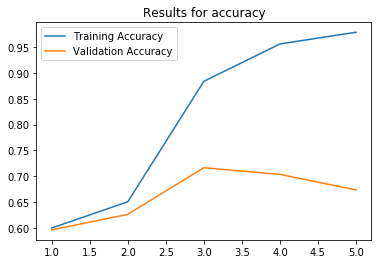

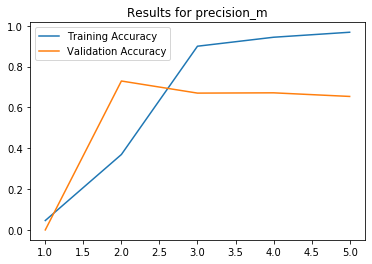

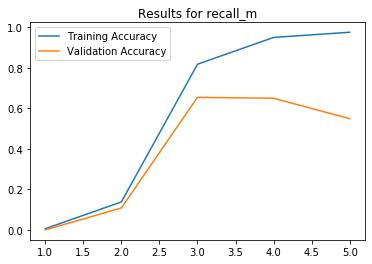

In [36]:
# Plot basic evaluation metrics across epochs
import matplotlib.pyplot as plt
%matplotlib inline

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()

### Predicting on unseen data

In [57]:
new_df=pd.read_csv("Data/army_unlab_v2.csv")
new_df.head()


,normalized
0,پاک فوج نے بھارتی سہنا کو سرحدی خلاف ورزی پر منہ توڑ جواب دیکر ثابت کر دیا پاک فوج دنیا کی بہترین فوج ہے
1,پی ٹی ایم نے ان دو قوم کو بچایا فوج تماشا دیکھ رہاہیں تاکہ قبائل ایک دوسرے کا دشمن بن جائے اس لے فوج اور ایف سی اور مقامی صرف نام کا پولیس ان قبائلیوں کا مسئلہ حل کرنے کے لئے نہیں گیا
2,یہ ہیں وہ صاحب جن کی معمولی سی تنخواہ میں دو بچے انگلینڈ میں اور ایک بچی جرمنی میں تعلیم حاصل کر رہی ہے اور ہماری تنخواہ میں تین بچے الائیڈ سکول میں نہیں پڑھ سکتے
3,جو لوگ آج پاک فوج پر بھونکتے ہیں ان کے لئے یہ ایک نصیحت ہے یاد رکھو اگر پاک فوج نہ ہو تو جلد ہی تمہارے گھروں میں کفار اور مشرکین کی فوج اور خوارج دہشت گرد اسی طرح تمہیں اور تمہاری عورتوں کو رسوا ک...
4,نکتہ چینی کہتے ھیں کہ کسی سلطنت کے بادشاہ نے جنگ میں شریک ھونے والے گھوڑوں کے اصطبل کے ساتھ ہی گدھے بھی رکھے ہوۓ تھے گدھے ہر روز گھوڑوں کا بچا ہوا کھانا کھاتے اور گھوڑوں کو ویہلا اور نکما کہتے اند...


In [63]:
s = tfidf_vect.transform(new_df["normalized"])
preds=SGC.predict(s)

In [64]:
preds

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [73]:
s2=loaded_vect.transform(new_df["normalized"])

In [74]:
preds_b=loaded_SGC.predict(s2)

In [76]:
preds_b

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [79]:
LR.predict_proba(s)

array([[0.77139184, 0.22860816],
       [0.5512465 , 0.4487535 ],
       [0.47128087, 0.52871913],
       ...,
       [0.49120786, 0.50879214],
       [0.4134225 , 0.5865775 ],
       [0.58326512, 0.41673488]])

In [78]:
loaded_SGC.decision_function(s)

array([-0.93463473,  0.01305705,  0.31522041, ...,  0.14098751,
        0.81018728, -0.55683898])